# 1. Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

# 2. Read the data as a data frame

In [3]:
data = pd.read_csv('./insurance (2).csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3.Perform basic EDA which should include the following and print out your insights at every step.

## a. Shape of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Ans:  <span style="color:red"> The shape of data is (1338 x 7) </span>

## b. Data type of each attribute

#### Ans:<span style="color:red"> The data type of attributes are (obtained from the info() method):</span>

| age      | int64   |
|----------|---------|
| sex      | object  |
| bmi      | float64 |
| children | int64   |
| smoker   | object  |
| region   | object  |
| charges  | float64 |

## c.Checking the presence of missing values

In [5]:
data.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


#### Ans: <span style="color:red">There are no missing values</span>

5 point summary of numerical attributes## d. 5 point summary of numerical attributes

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Ans:<span style="color:red"> The 5 point summary is:</span>
|   5-points   |    age    |    bmi    | children |    charges   |
|:------------:|:---------:|:---------:|:--------:|:------------:|
|    Minimum   | 18.000000 | 15.960000 | 0.000000 |  1121.873900 |
| 1st Quartile | 27.000000 | 26.296250 | 0.000000 |  4740.287150 |
|    Median    | 39.000000 | 30.400000 | 1.000000 |  9382.033000 |
| 3rd Quartile | 51.000000 | 34.693750 | 2.000000 | 16639.912515 |
|    Maximum   | 64.000000 | 53.130000 | 5.000000 | 63770.428010 |

## e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. 

#### Ans: <span style="color:red">Visualizing distribution with histogram:</span>

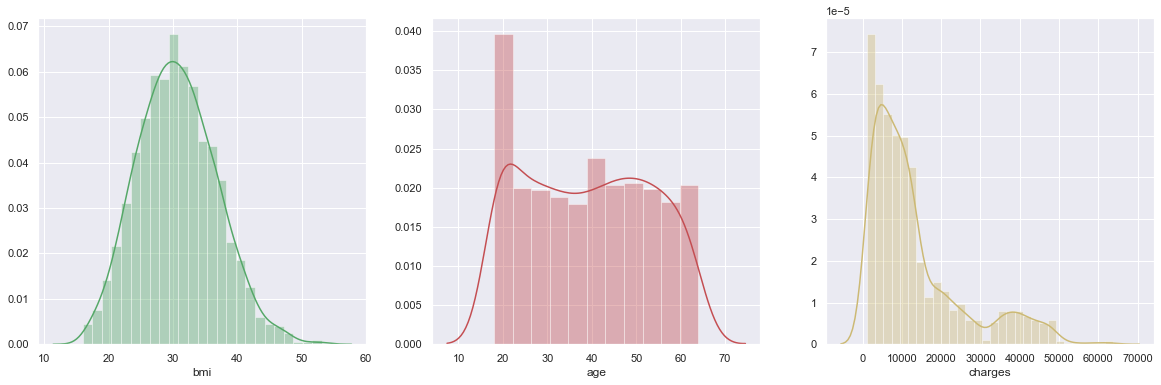

In [32]:
fig, axs = plt.subplots(1,3, figsize=(20,6))
sns.set_color_codes()
sns.distplot(data.bmi, color="g", ax=axs[0]);
sns.distplot(data.age, color="r", ax=axs[1]);
sns.distplot(data.charges, color="y", ax=axs[2]);

#### Visualizing distribution with histograms without kernal density estimate normalization

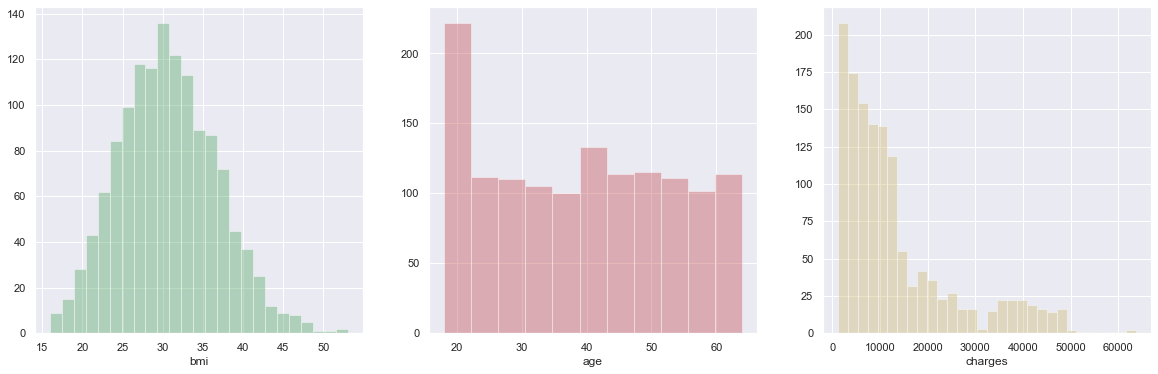

In [38]:
fig, axs = plt.subplots(1,3, figsize=(20,6))
sns.set_color_codes()
sns.distplot(data.bmi, color="g", ax=axs[0], kde=False);
sns.distplot(data.age, color="r", ax=axs[1], kde=False);
sns.distplot(data.charges, color="y", ax=axs[2], kde=False);

## e. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

#### Using Python:

In [48]:
data.skew(axis=0)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

#### Ans : <span style="color:red">Mesure of skewness for bmi, age and charges:</span>

| Variable | Measure of Skewness |
|:--------:|:-------------------:|
|    age   |       0.055673      |
|    bmi   |       0.284047      |
|  charges |       1.515880      |

#### Detailed description

> For "bmi" distribution:


| Vaiable |   Value   |
|:-------:|:---------:|
|  X_Min  | 15.960000 |
|    Q1   | 26.296250 |
|  Median | 30.400000 |
|    Q3   | 34.693750 |
|  X_max  | 53.130000 |

* Median - X_Min = 30.400000 - 15.960000 = 14.439998
* X_Max - Median = 53.130000 - 30.400000 = 22.730000
* Q_1 - X_Min = 26.296250 - 15.960000 = 10.33625
* X_max - Q_3 = 53.130000 - 34.693750 = 18.43625
* Median - Q1 = 30.400000 - 26.296250 = 4.10374
* Q3 - Median = 34.693750 - 30.400000 = 4.293750

Here: 
* Median - X_Min < X_Max - Median
* Q_1 - X_Min < X_max - Q_3
* Median - Q1 < Q3 - Median

#### Therefore distribution is clearly Right-Skewed

> For "age" distribution:

| Vaiable |   Value   |
|:-------:|:---------:|
|  X_Min  | 18.000000 |
|    Q1   | 27.000000 |
|  Median | 39.000000 |
|    Q3   | 51.000000 |
|  X_max  | 64.000000 |


* Median - X_Min = 39.000000 - 18.000000 = 21.0
* X_Max - Median = 64.000000 - 39.000000 = 25.0
* Q_1 - X_Min = 27.000000 - 18.000000 = 9.0
* X_max - Q_3 = 64.000000 - 51.000000 = 13.0
* Median - Q1 = 39.000000 - 27.000000 = 12.0
* Q3 - Median = 51.000000 - 39.000000 = 12.0

Here: 
* Median - X_Min < X_Max - Median
* Q_1 - X_Min < X_max - Q_3
* Median - Q1 = Q3 - Median

#### Therefore distribution is clearly Right-Skewed

> For "charges" distribution:

| Vaiable |     Value    |
|:-------:|:------------:|
|  X_Min  |  1121.873900 |
|    Q1   |  4740.287150 |
|  Median |  9382.033000 |
|    Q3   | 16639.912515 |
|  X_max  | 63770.428010 |


* Median - X_Min = 9382.033000 - 1121.873900 = 8260.159098
* X_Max - Median = 63770.428010 - 9382.033000 = 54388.395010
* Q_1 - X_Min = 4740.287150 - 1121.873900 = 3618.41325
* X_max - Q_3 = 63770.428010 - 16639.912515 = 47130.515495
* Median - Q1 = 9382.033000 - 4740.287150 = 4641.745849
* Q3 - Median = 16639.912515 - 9382.033000 = 7257.879515


* Median - X_Min < X_Max - Median
* Q_1 - X_Min < X_max - Q_3
* Median - Q1 < Q3 - Median

#### Therefore distribution is clearly Right-Skewed

## f.Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

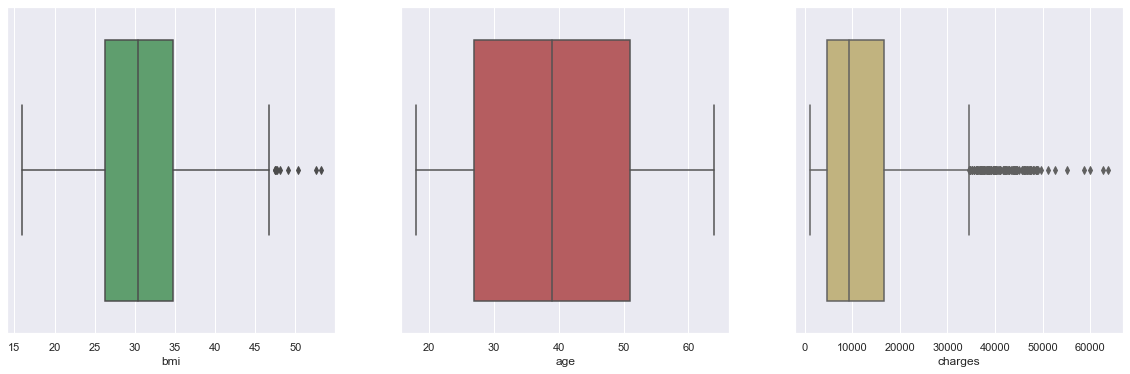

In [42]:
fig, axs = plt.subplots(1,3, figsize=(20,6))
sns.set_color_codes()
sns.boxplot(data.bmi, color="g", ax=axs[0]);
sns.boxplot(data.age, color="r", ax=axs[1]);
sns.boxplot(data.charges, color="y", ax=axs[2]);

#### Ans: <span style="color:red">From the box plots, outliers are present in "bmi" and "charge" columns</span>

## g. Distribution of categorical columns (include children) 

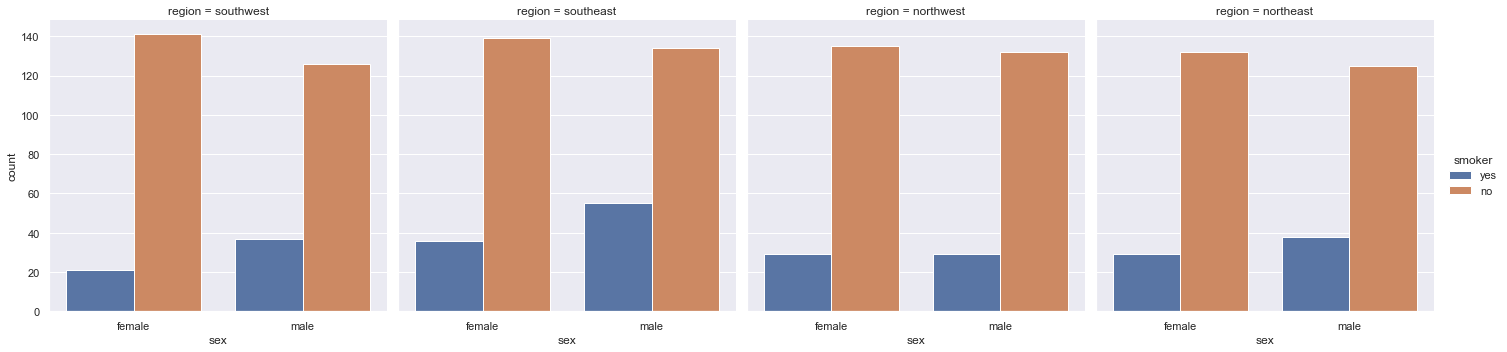

In [90]:
sns.catplot(x="sex",
               hue="smoker", 
               col="region", 
               data=data, 
               kind="count");

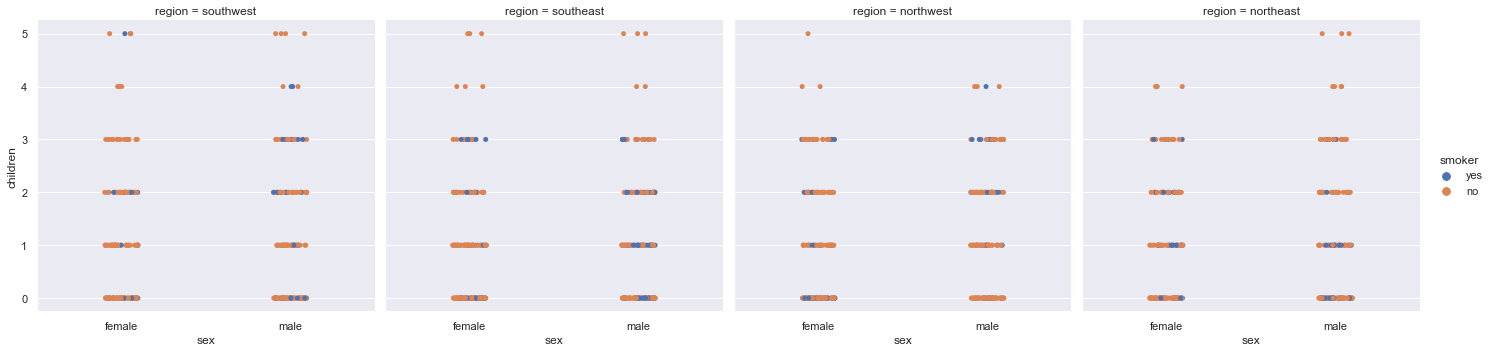

In [94]:
sns.catplot(x="sex",
               y = "children",
               hue="smoker", 
               col="region", 
               data=data, 
               kind="strip");

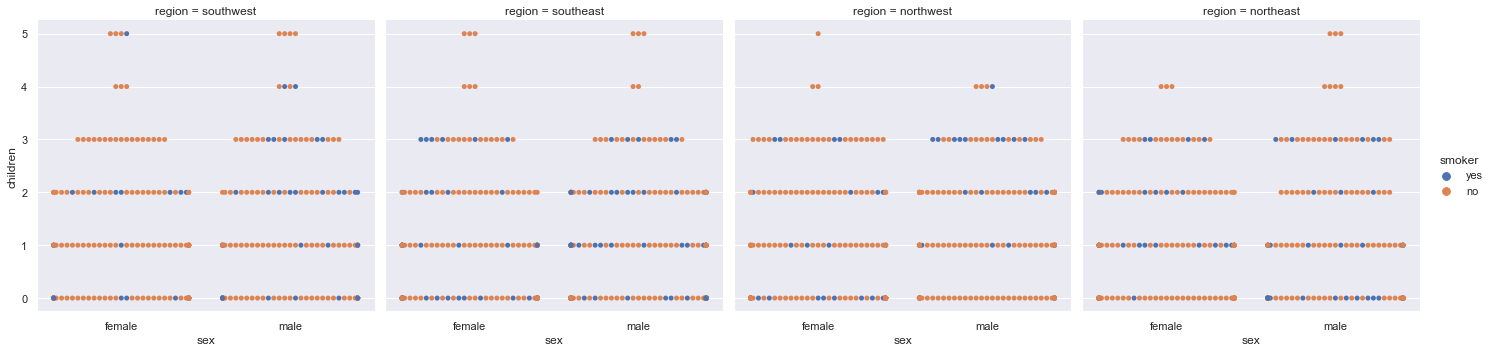

In [95]:
sns.catplot(x="sex",
               y = "children",
               hue="smoker", 
               col="region", 
               data=data, 
               kind="swarm");

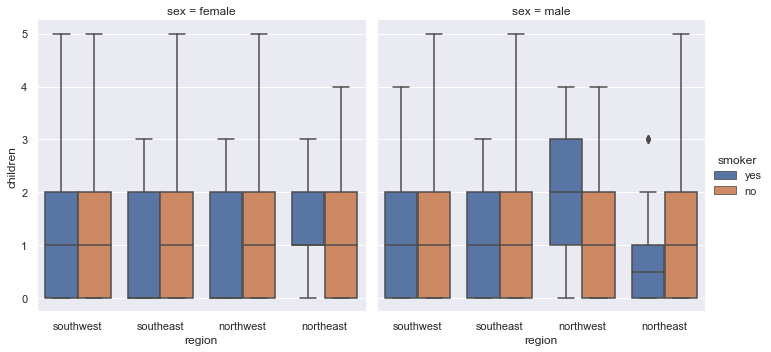

In [96]:
sns.catplot(x="region",
               y = "children",
               hue="smoker", 
               col="sex", 
               data=data, 
               kind="box");

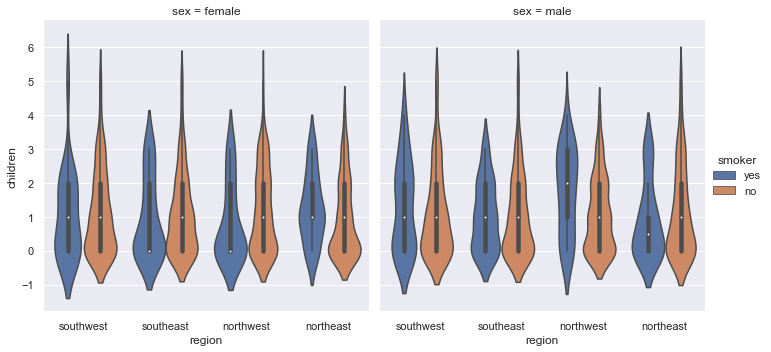

In [97]:
sns.catplot(x="region",
               y = "children",
               hue="smoker", 
               col="sex", 
               data=data, 
               kind="violin");

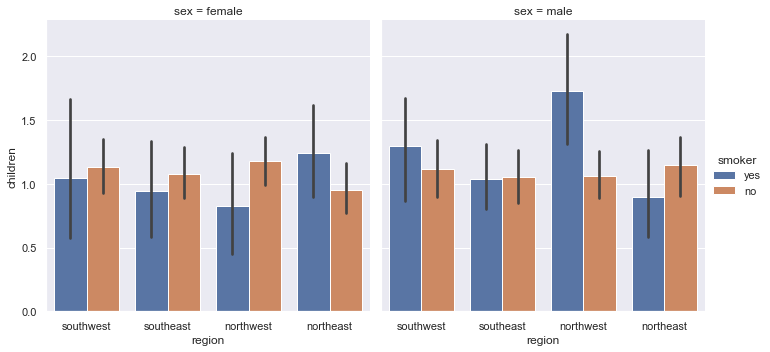

In [98]:
sns.catplot(x="region",
               y = "children",
               hue="smoker", 
               col="sex", 
               data=data, 
               kind="bar");

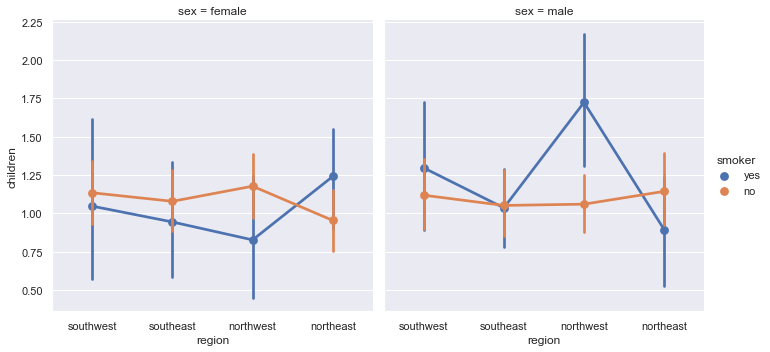

In [99]:
sns.catplot(x="region",
               y = "children",
               hue="smoker", 
               col="sex", 
               data=data, 
               kind="point");

## h. Pair plot that includes all the columns of the data frame

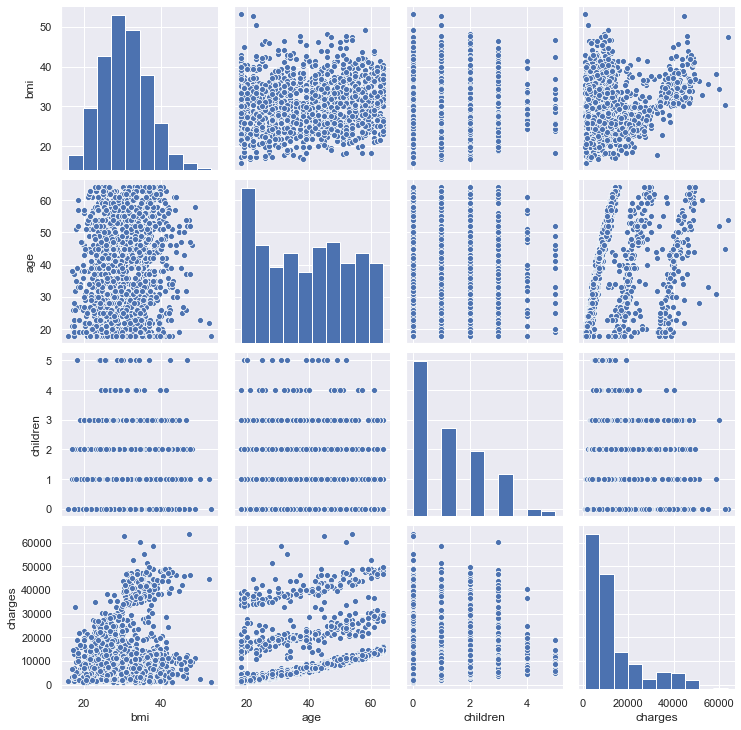

In [93]:
sns.pairplot(data[['bmi', 'age', 'children', 'charges']]);

# 4. Answer the following questions with statistical evidence

## a. Do charges of people who smoke differ significantly from the people who don't?

* H0: Charges of smokers and non-smokers are same ($\mu_1 = \mu_2$)
* Ha: Charges of smokers and non-smokers are significantly different ($\mu_1 \neq \mu_2$)

#### Selecting the appropreiate test:

  * The variable 'charges' is continious
  * The population standard deviation is unknown
  * Two samples are present 
  * The samples are independent 
  
#### Assumptions:

   * The population have identical variance
   * Significance level $\alpha$ = 0.01
  
#### Therefore we select '2_sample_t-test'

In [129]:
#separating data
group1 = data[data['smoker'] == 'yes']['charges']
group2 = data[data['smoker'] == 'no']['charges']
t_statistic, p_value = ttest_ind(np.array(group1), np.array(group2))
t_statistic, p_value

(46.664921172723716, 8.271435842177219e-283)

#### Ans: <span style="color:red">Since the p_value << $\alpha$ , we reject the NULL hypothesis.</span>

> Charges of smokers and non-smokers are significantly different with a confidence level of 99%

### Graphical Illustration:

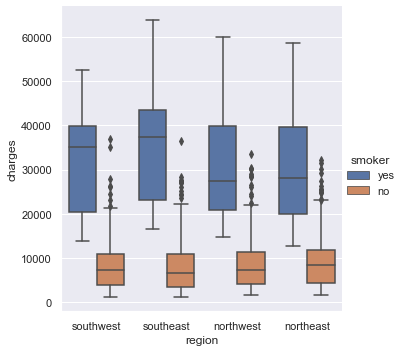

In [148]:
sns.catplot(x="region",
               y = "charges",
               hue="smoker",  
               data=data, 
               kind="box");

## b. Does bmi of males differ significantly from that of females?

* H0: Bmi of males and femals are same ($\mu_1 = \mu_2$)
* Ha: Bmi of mails and femals are significantly different ($\mu_1 \neq \mu_2$)
 
#### Selecting the appropreiate test:

  * The variable 'bmi' is continious
  * The population standard deviation is unknown
  * Two samples are present 
  * The samples are independent 
  
#### Assumptions:

   * The population have identical variance
   * Significance level $\alpha$ = 0.05
  
#### Therefore we select '2_sample_t-test'

In [149]:
#separating data
group1 = data[data['sex'] == 'male']['bmi']
group2 = data[data['sex'] == 'female']['bmi']
t_statistic, p_value = ttest_ind(np.array(group1), np.array(group2))
t_statistic, p_value

(1.696752635752224, 0.08997637178984932)

#### Ans: <span style="color:red">Since the p_value > $\alpha$ , we fail to reject the NULL hypothesis.</span>

> The bmi of males and females are not significantly different with confidence level of 95%

### Graphical Illustration:

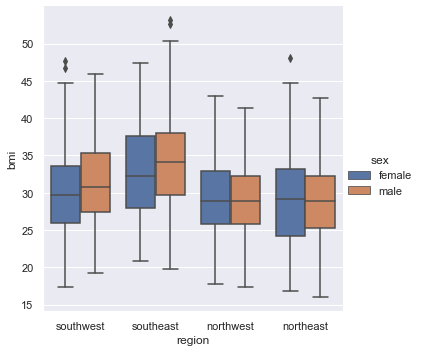

In [150]:
sns.catplot(x="region",
               y = "bmi",
               hue="sex",  
               data=data, 
               kind="box");

## c. Is the proportion of smokers significantly different in different genders?

* H0: Proportion of smokers for male and female are same ($p_1 = p_2$)
* Ha: Proportion of smokers for male and female are significantly different ($p_1 \neq p_2$)

#### Selecting the appropreiate test:

  * The variables 'smoker' and 'sex' are categorical
  * Two samples are present 
  * The samples are independent 
  
#### Assumptions:

   * Significance level $\alpha$ = 0.05
  
#### Therefore we select '2sample_proportion_test'

In [155]:
male_smokers = data[data['sex'] == 'male'].smoker.value_counts()[1]
female_smokers = data[data['sex'] == 'female'].smoker.value_counts()[1]  
n_males = data.sex.value_counts()[0]
n_females = data.sex.value_counts()[1]

In [157]:
stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])
stat, pval

(-2.7867402154855503, 0.005324114164320532)

#### Ans: <span style="color:red">Since the p_value << $\alpha$ , we reject the NULL hypothesis.</span>

> The proportion of smokers for male and female are significanly different with confidence level 95%

### Graphical Illustration:

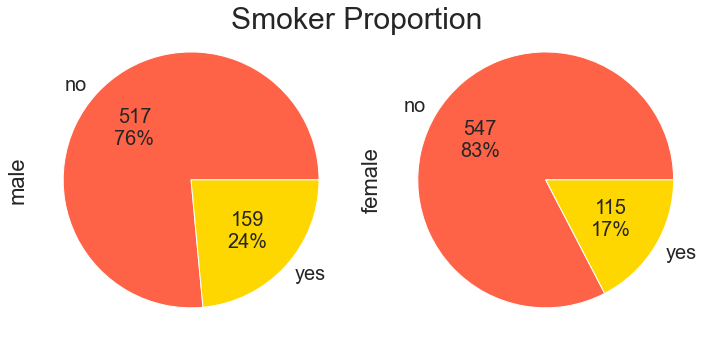

In [179]:
male_data = data[data['sex'] == 'male']
female_data = data[data['sex'] == 'female']

def label_function_male(val):
    return f'{val / 100 * len(male_data):.0f}\n{val:.0f}%'

def label_function_female(val):
    return f'{val / 100 * len(female_data):.0f}\n{val:.0f}%'


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

male_data.groupby('smoker').size().plot(kind='pie', autopct=label_function_male, textprops={'fontsize': 20}, colors=['tomato', 'gold', 'skyblue'], ax=ax1);
female_data.groupby('smoker').size().plot(kind='pie', autopct=label_function_female, textprops={'fontsize': 20}, colors=['tomato', 'gold', 'skyblue'], ax=ax2);

ax1.set_ylabel('male', size=22)
ax2.set_ylabel('female', size=22)
fig.suptitle('Smoker Proportion', size = 30)
plt.tight_layout()
plt.show()

## d. Is the distribution of bmi across women with no children, one child and two children, the same?

* H0: Distribution of women with no children, one child and two child are same ($\mu1$ = $\mu2$ = $\mu3$)
* Ha: Distribution of women with no children, one child and two child are different (At least one $\mu$ differs)

#### Selecting the appropreiate test:

  * The variable 'bmi' is continious
  * The population standard deviation is unknown
  * More than two samples are present 
  * The samples are independent 
  
#### Assumptions:

   * The population have identical variance
   * Significance level $\alpha$ = 0.05
  
#### Therefore we select 'ANOVA' test

In [181]:
mod = ols('bmi ~ children', data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df         F   PR(>F)
children      8.093929     1.0  0.217522  0.64101
Residual  49712.106457  1336.0       NaN      NaN


#### Ans: <span style="color:red">Since the p_value > $\alpha$ , we fail to reject the NULL hypothesis.</span>

> The distribution of bmi across women with no children, one child and two children, are the same with confidence level of 95%

### Graphical Illustration: 

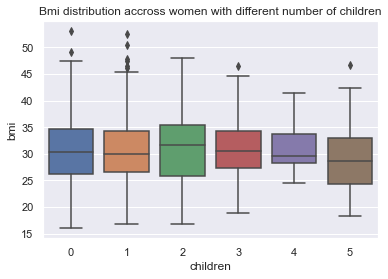

In [182]:
sns.boxplot(x = "children", y = "bmi", data = data)
plt.title('Bmi distribution accross women with different number of children')
plt.show()

In [187]:
#Alternate method using 'f_oneway' function
from scipy.stats import f_oneway as f
f(data[data['children']==0]['bmi'], data[data['children']==1]['bmi'], data[data['children']==2]['bmi'])

F_onewayResult(statistic=0.4169829280345703, pvalue=0.6591330886467935)